In [1]:
import scipy.io
import numpy as np
import scipy as sp
from scipy import signal
import cupy as cp
import matplotlib.pyplot as plt
from SWE_utils_cupy_standalone import *
import os
import time

path = "./Parametric_tests/Test_13/rec_sws_estim/"

# Load data and print data for inspection

In [2]:
# Load datasets SSI
#ifactors = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 15]
ifactors = [1, 2, 3, 5, 10, 15]
#ifactors = [1, 5, 15]
idx = 4
sws_maps = []
SWV_A = []
SWV_B = []
SWV_C = []

for i in ifactors:
    # Load sws maps
    dataset = sp.io.loadmat(path + 'sws_iFactor' + str(i) + '_iOrder2_id_' + str(idx) + '.mat') 
    din = dataset["data"]     
    sws_maps.append(din) 
    
    # Load intermediate results
    dataset = sp.io.loadmat(path + 'sws_A__iFactor' + str(i) + '_iOrder2_id_' + str(idx) + '.mat') 
    din = dataset["data"]     
    SWV_A.append(din) 
    
    dataset = sp.io.loadmat(path + 'sws_B__iFactor' + str(i) + '_iOrder2_id_' + str(idx) + '.mat') 
    din = dataset["data"]     
    SWV_B.append(din) 
    
    dataset = sp.io.loadmat(path + 'sws_C__iFactor' + str(i) + '_iOrder2_id_' + str(idx) + '.mat') 
    din = dataset["data"]     
    SWV_C.append(din)  

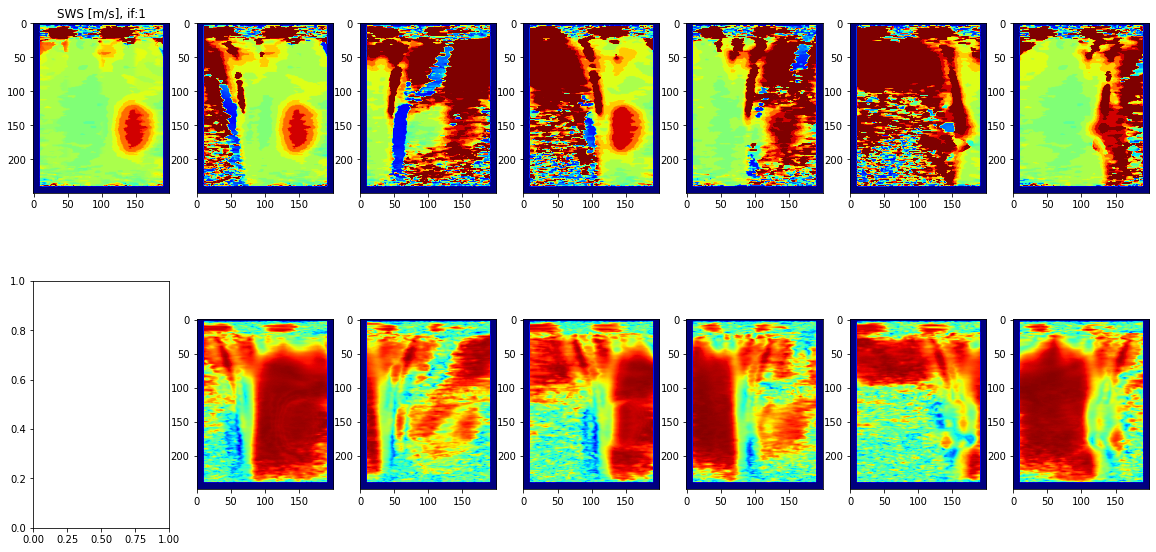

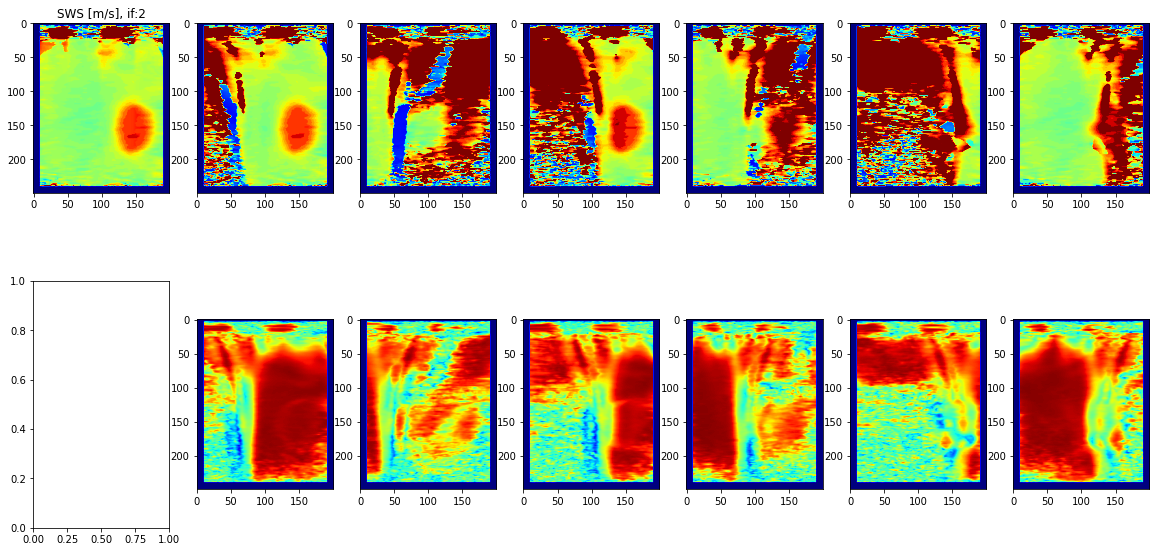

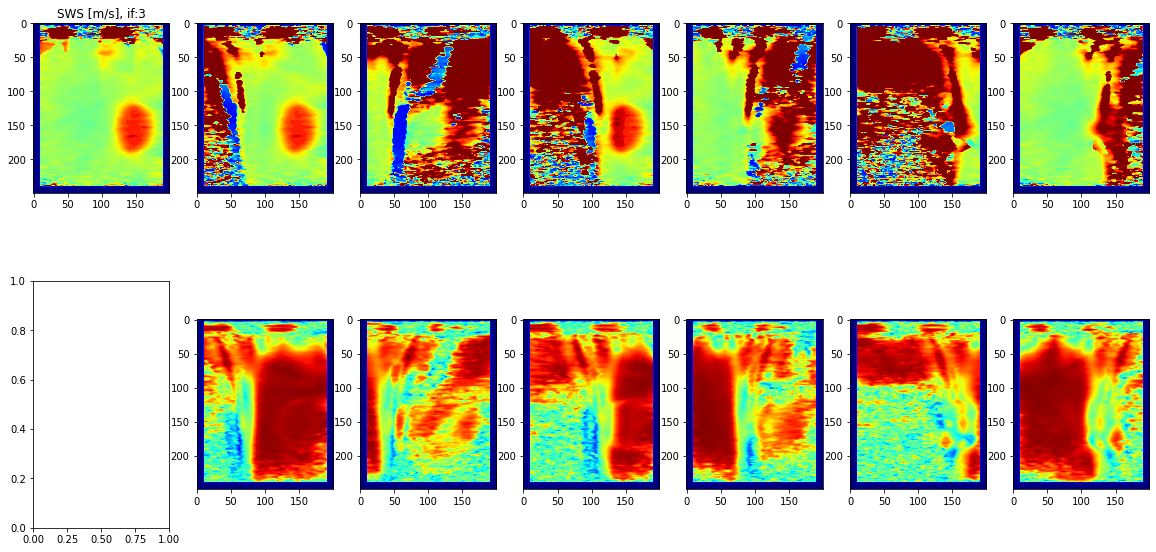

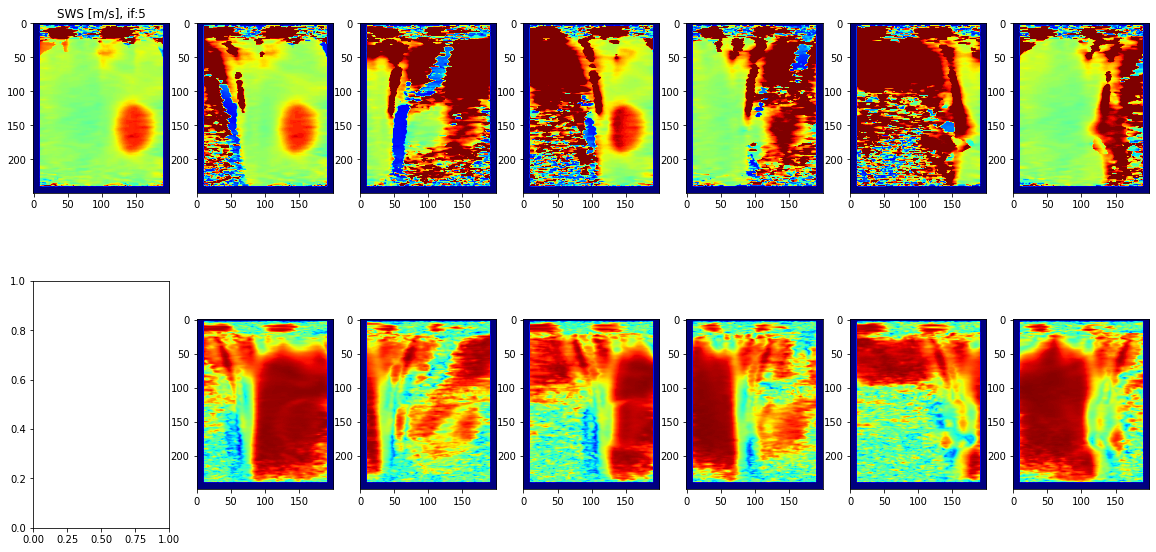

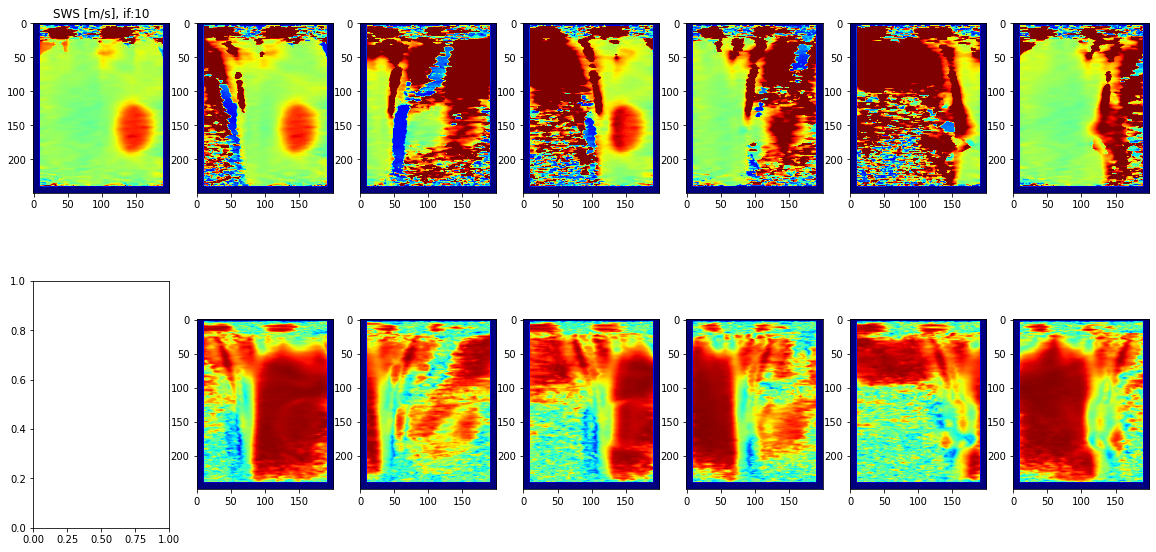

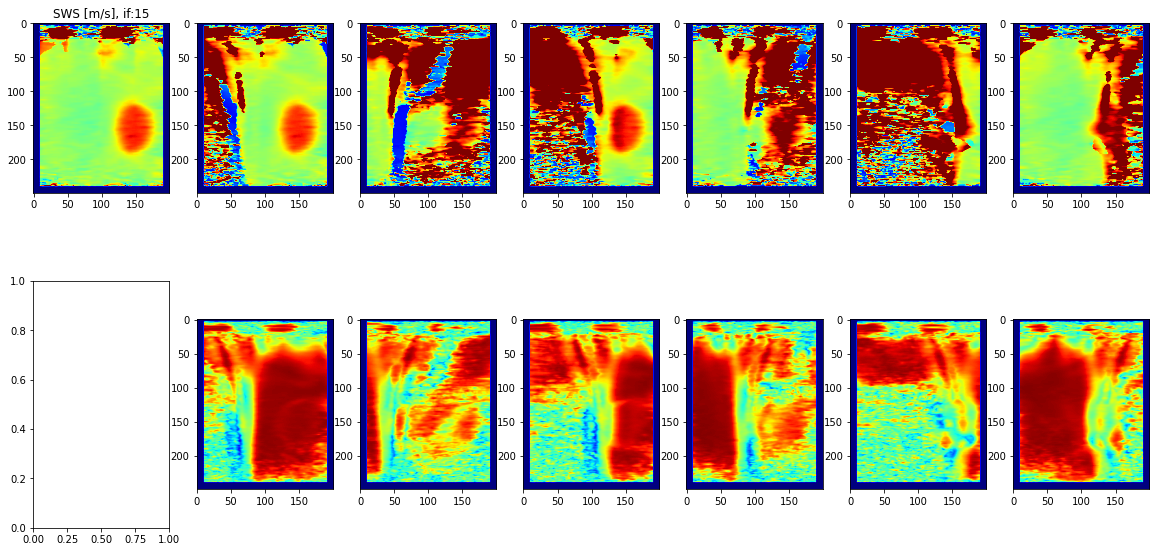

In [3]:
#plt.rcParams.update({'font.size': 12})

#Visualize the results
norm_sws = plt.Normalize(0, 4.5, True)
norm_r   = plt.Normalize(0, 1, True)


for i in range(len(sws_maps)):
    fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
    axs[0][0].imshow(np.squeeze(sws_maps[i]), cmap='jet', norm=norm_sws)
    axs[0][0].set_title('SWS [m/s], if:' + str(ifactors[i]))
    
    axs[0][1].imshow(np.squeeze(SWV_A[i][0, 0, ...]), cmap='jet', norm=norm_sws)
    axs[0][2].imshow(np.squeeze(SWV_A[i][0, 1, ...]), cmap='jet', norm=norm_sws)
    axs[0][3].imshow(np.squeeze(SWV_B[i][0, 0, ...]), cmap='jet', norm=norm_sws)
    axs[0][4].imshow(np.squeeze(SWV_B[i][0, 1, ...]), cmap='jet', norm=norm_sws)
    axs[0][5].imshow(np.squeeze(SWV_C[i][0, 0, ...]), cmap='jet', norm=norm_sws)
    axs[0][6].imshow(np.squeeze(SWV_C[i][0, 1, ...]), cmap='jet', norm=norm_sws)
    
    axs[1][1].imshow(np.squeeze(SWV_A[i][1, 0, ...]), cmap='jet', norm=norm_r)
    axs[1][2].imshow(np.squeeze(SWV_A[i][1, 1, ...]), cmap='jet', norm=norm_r)
    axs[1][3].imshow(np.squeeze(SWV_B[i][1, 0, ...]), cmap='jet', norm=norm_r)
    axs[1][4].imshow(np.squeeze(SWV_B[i][1, 1, ...]), cmap='jet', norm=norm_r)
    axs[1][5].imshow(np.squeeze(SWV_C[i][1, 0, ...]), cmap='jet', norm=norm_r)
    axs[1][6].imshow(np.squeeze(SWV_C[i][1, 1, ...]), cmap='jet', norm=norm_r)    
    


In [4]:
## Homogeneous analysis

# crop data to the ROI
sws_roi = []
for i in range(len(sws_maps)):
    sws_roi.append(sws_maps[i][100:200, 50:150])
    
# Find average SWS
means = np.zeros(len(sws_maps))
for i in range(len(sws_maps)):
    means[i] = np.mean(sws_roi[i])

means = means 
    
print(means)    


# Find average SWS from one SSI dataset
means = np.zeros(len(sws_maps))
for i in range(len(sws_maps)):
    means[i] = np.mean(SWV_A[i][0, 0, 100:200, 100:150])

means = means 
    
print(means)    



[2.64093742 2.6144331  2.61343258 2.6076856  2.60499606 2.60405275]
[2.99062085 2.95019167 2.95100261 2.94367469 2.94103544 2.93988916]


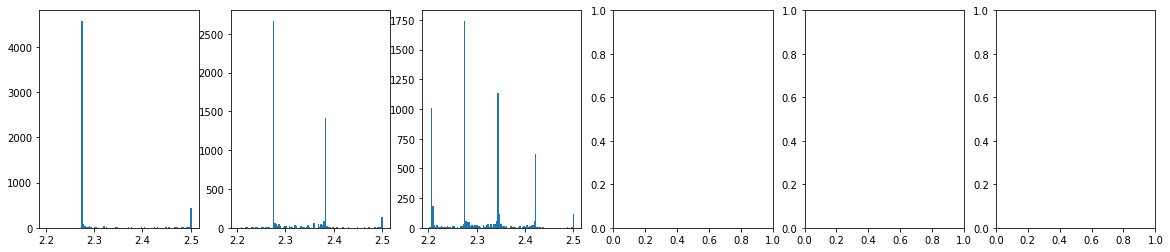

In [5]:
# Show historam of values
index = 0

n_bins = 100
xlim = 0.1
x_width = xlim/n_bins

fig, axs = plt.subplots(1, len(ifactors), figsize =(20, 4), tight_layout = False)
for i in range(3):
    heightsA = axs[i].hist(sws_roi[i].flatten(), bins = n_bins, range=[2.2, 2.5], align='right')

In [ ]:
# Analyze r maps
# crop data to the ROI
r_roi = []
for i in range(len(sws_maps)):
    r_roi.append(SWV_A[i][1, 0, 100:200, 110:160])
    
# Find average SWS
means_r = np.zeros(len(r_roi))
for i in range(len(r_roi)):
    means_r[i] = np.mean(r_roi[i])

    
print(means_r)    

 


In [ ]:
#%matplotlib widget
#plt.rc("figure", dpi=400)

## Visualize data for manuscript
# Settings
# Assign ticks
y_grid = 5  #[mm] -- how to arrange ticks
x_grid = 5  #[mm]
grid_step = 0.2
norm_sws = plt.Normalize(0, 4.5, True)

# Print and format images
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

for i in range(3):
    pcm = axs[i].imshow(np.squeeze(sws_maps[i][25:241, :]), cmap='jet', norm=norm_sws)
    axs[i].set_title('SWS map, IF=' + str(ifactors[idx]))
    fig.colorbar(pcm, ax=axs[i], label='[m/s]')

    im_dim = sws_maps[idx][25:241, :].shape

    yticks  = np.arange(0, im_dim[0]-1, int(np.ceil(y_grid / grid_step))) 
    yticks_labels = (yticks * grid_step) + 5
    yticks_labels = [str(int(x)) for x in yticks_labels]

    m = int(im_dim[1]//2)
    a = np.arange(m, 0, -int(np.ceil(x_grid / grid_step)))
    b = np.arange(m, im_dim[1]-1, int(np.ceil(x_grid / grid_step)))
    xticks = np.concatenate((a[1:], b))
    xticks_labels = (xticks - m) * grid_step
    xticks_labels = [str(int(x)) for x in xticks_labels]

    axs[i].set_xlim([10,190])    
        #axs[0][i].set_ylim([25,230]) 

    axs[i].set_xticks(xticks)
    axs[i].set_xticklabels(xticks_labels) 
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(yticks_labels)

    # Set labels
    axs[i].set_xlabel('x [mm]')
    axs[i].set_ylabel('z [mm]')
    
    

  

In [ ]:
# Print and format images
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
for i in range(3):    
    heights = axs[i].hist(sws_roi[i].flatten(), bins = n_bins, range=[2.2, 2.5], align='right') 
    
    axs[i].set_title('SWS map histogram, IF=' + str(ifactors[i]))
    # Set labels
    axs[i].set_xlabel('SWS [m/s]')
    axs[i].set_ylabel('# of pixels')
    
#fig.tight_layout()    

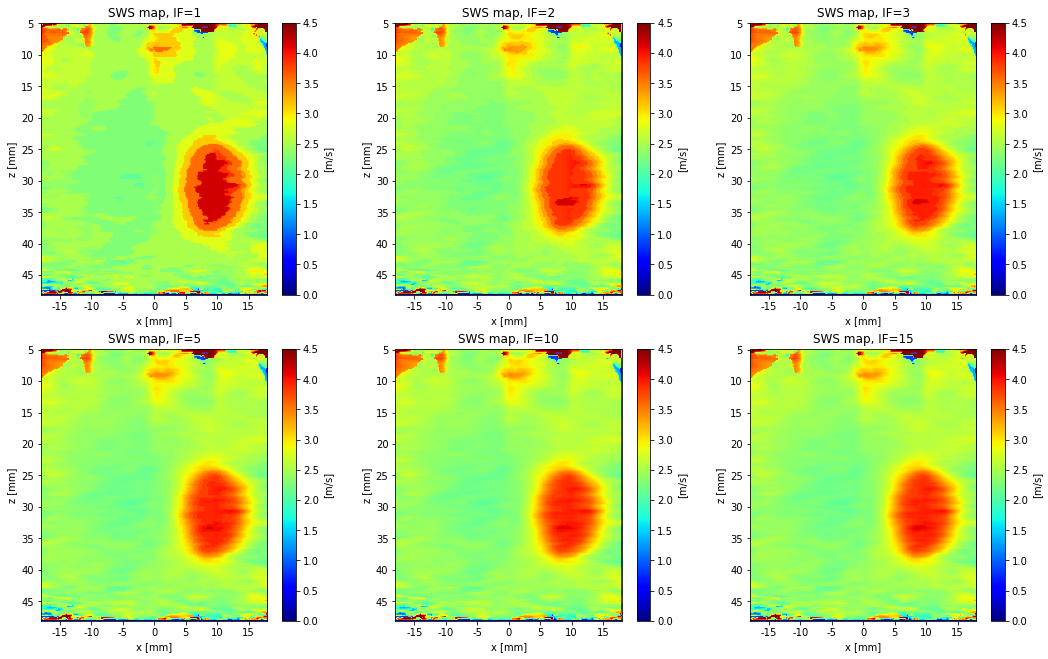

In [6]:
# Heterogeneous presentation for manuscript
#%matplotlib widget
#plt.rc("figure", dpi=400)

# Settings
# Assign ticks
y_grid = 5  #[mm] -- how to arrange ticks
x_grid = 5  #[mm]
grid_step = 0.2
norm_sws = plt.Normalize(0, 4.5, True)

# Print and format images
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 11))

for i in range(6):
    
    i_r = int(i/3)
    i_c = i%3
    pcm = axs[i_r][i_c].imshow(np.squeeze(sws_maps[i][25:241, :]), cmap='jet', norm=norm_sws)
    axs[i_r][i_c].set_title('SWS map, IF=' + str(ifactors[i]))
    fig.colorbar(pcm, ax=axs[i_r][i_c], label='[m/s]')

    im_dim = sws_maps[i][25:241, :].shape

    yticks  = np.arange(0, im_dim[0]-1, int(np.ceil(y_grid / grid_step))) 
    yticks_labels = (yticks * grid_step) + 5
    yticks_labels = [str(int(x)) for x in yticks_labels]

    m = int(im_dim[1]//2)
    a = np.arange(m, 0, -int(np.ceil(x_grid / grid_step)))
    b = np.arange(m, im_dim[1]-1, int(np.ceil(x_grid / grid_step)))
    xticks = np.concatenate((a[1:], b))
    xticks_labels = (xticks - m) * grid_step
    xticks_labels = [str(int(x)) for x in xticks_labels]

    axs[i_r][i_c].set_xlim([10,190])    
        #axs[0][i].set_ylim([25,230]) 

    axs[i_r][i_c].set_xticks(xticks)
    axs[i_r][i_c].set_xticklabels(xticks_labels) 
    axs[i_r][i_c].set_yticks(yticks)
    axs[i_r][i_c].set_yticklabels(yticks_labels)

    # Set labels
    axs[i_r][i_c].set_xlabel('x [mm]')
    axs[i_r][i_c].set_ylabel('z [mm]')
    
plt.rcParams.update({'font.size': 12})
    


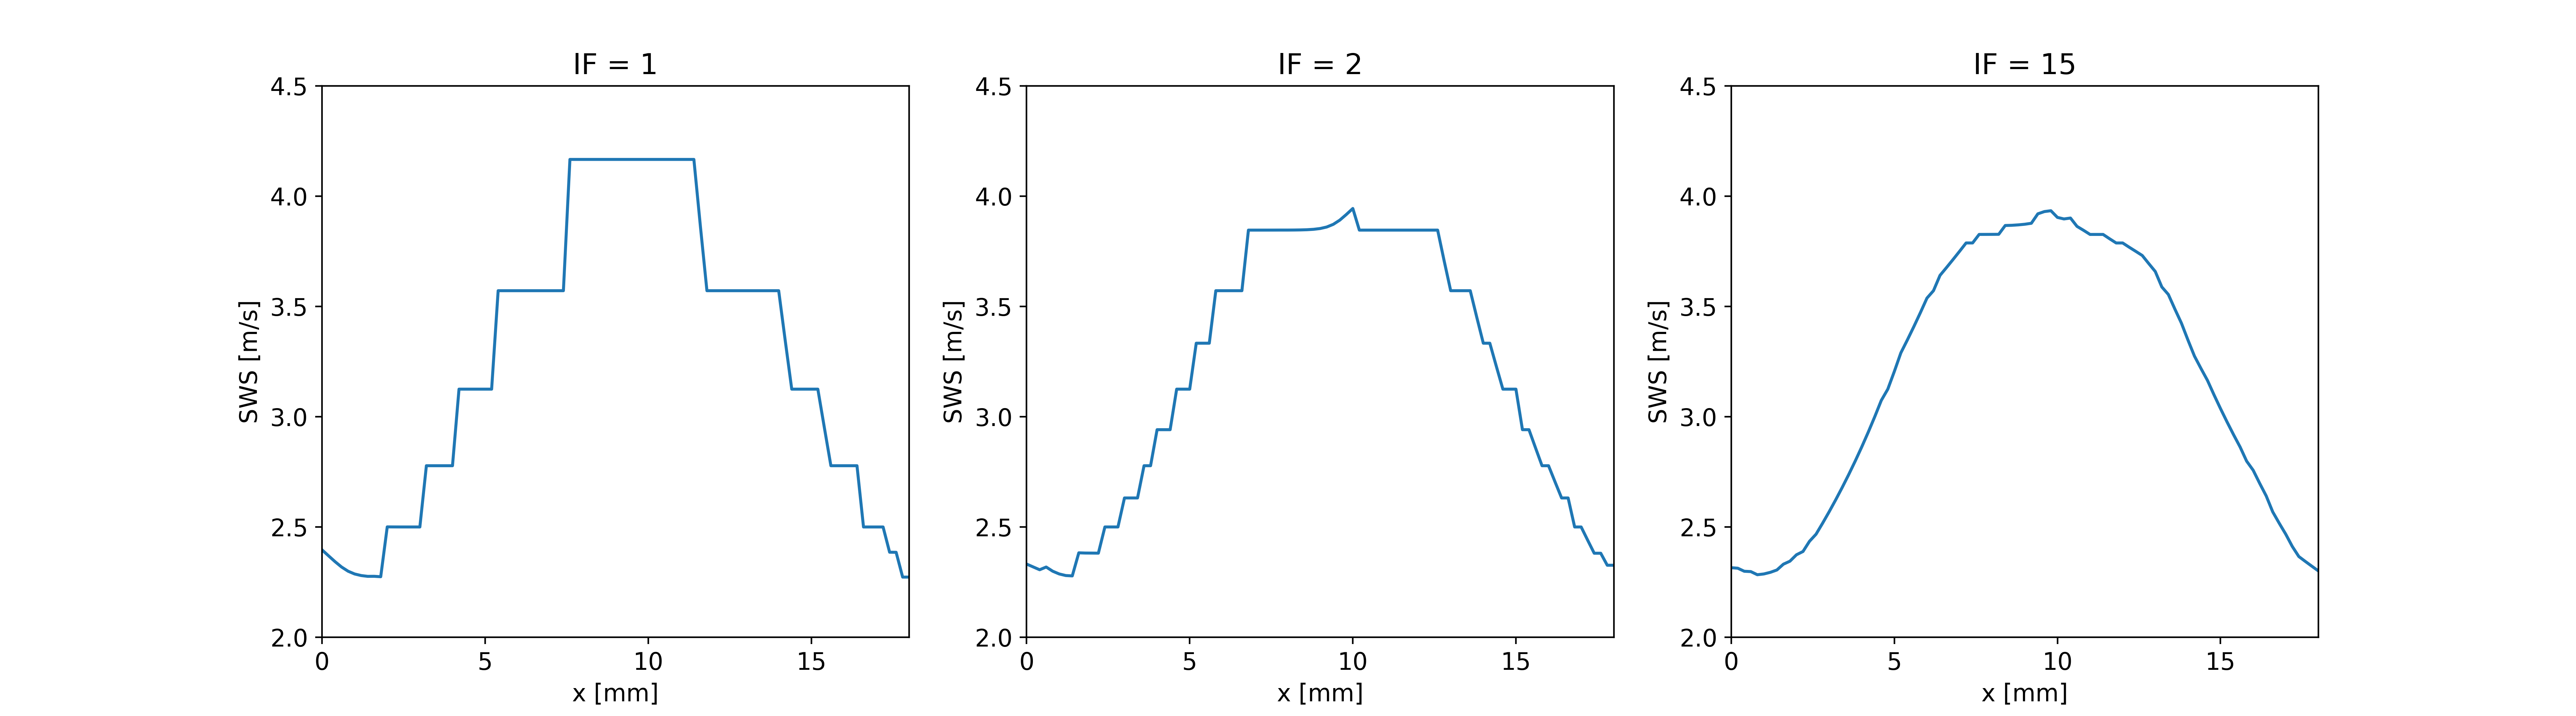

In [14]:
# Plot profiles
%matplotlib widget
plt.rc("figure", dpi=400)

x1 = sws_maps[0][150, 99:-10]
x2 = sws_maps[1][150, 99:-10]
x3 = sws_maps[5][150, 99:-10]

x_grid = 5  #[mm]
grid_step = 0.2

xticks  = np.arange(0, len(x1)-1, int(np.ceil(x_grid / grid_step))) 
xticks_labels = (xticks * grid_step)
xticks_labels = [str(int(x)) for x in xticks_labels]

# Print and format images
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axs[0].plot(x1)
axs[0].set_title('IF = 1')
axs[0].set_ylim([2, 4.5])
axs[0].set_xlim([0, 90])
axs[1].plot(x2)
axs[1].set_ylim([2, 4.5])
axs[1].set_xlim([0, 90])
axs[1].set_title('IF = 2')
axs[2].plot(x3)
axs[2].set_ylim([2, 4.5])
axs[2].set_xlim([0, 90])
axs[2].set_title('IF = 15')

axs[0].set_xticks(xticks)
axs[0].set_xticklabels(xticks_labels) 
axs[1].set_xticks(xticks)
axs[1].set_xticklabels(xticks_labels) 
axs[2].set_xticks(xticks)
axs[2].set_xticklabels(xticks_labels) 

for i in range(3):
    axs[i].set_xlabel('x [mm]')
    axs[i].set_ylabel('SWS [m/s]')
    
plt.rcParams.update({'font.size': 14})    
    

In [12]:
len(x1)

100

In [37]:
xticks

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])